# Chapter 8 - Ordinary Differential Equations

## 8.1 First-Order Differential Equations with One Variable

Some differential equations can be solved analytically by separation of variables. Others can be solved using inital or coundary contiations using <strong>Euler's method</strong> O(h<sup>2</sup>)

*x(t+h) = x(t) + h f(x,t)*

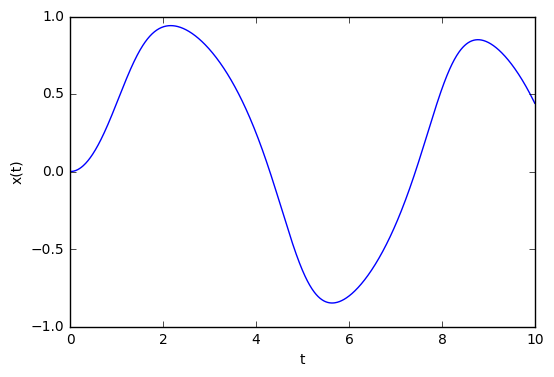

In [1]:
from math import sin
from numpy import arange
from pylab import plot,xlabel,ylabel,show

def f(x,t):
    return -x**3 + sin(t)

a = 0.0           # Start of the interval
b = 10.0          # End of the interval
N = 1000          # Number of steps
h = (b-a)/N       # Size of a single step
x = 0.0           # Initial condition

tpoints = arange(a,b,h)
xpoints = []
for t in tpoints:
    xpoints.append(x)
    x += h*f(x,t)

plot(tpoints,xpoints)
xlabel("t")
ylabel("x(t)")
show()

#### Runge-Kutta Method

<strong> Second Order Runge-Kutta</strong>
x(t+h) = x(t) + h f(x+ <sup>1</sup>&frasl;<sub>2</sub>h f(x,t) + <sup>1</sup>&frasl;<sub>2</sub> h) + O(h<sup>2</sup>)


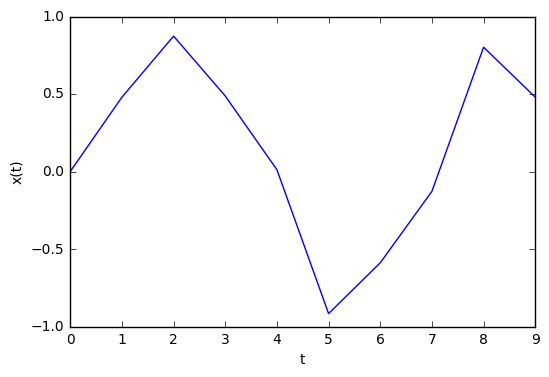

In [2]:
from math import sin
from numpy import arange
from pylab import plot,xlabel,ylabel,show

def f(x,t):
    return -x**3 + sin(t)

a = 0.0
b = 10.0
N = 10
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []

x = 0.0
for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    x += k2

plot(tpoints,xpoints)
xlabel("t")
ylabel("x(t)")
show()

<strong> Fourth Order Runge-Kutta</strong> 

k<sub>1</sub> = h f(x,t)

k<sub>2</sub> = h f(x + <sup>1</sup>&frasl;<sub>2</sub> k<sub>1</sub>, t + <sup>1</sup>&frasl;<sub>2</sub>h)

k<sub>3</sub> = h f(x + <sup>1</sup>&frasl;<sub>2</sub> k<sub>2</sub>, t + <sup>1</sup>&frasl;<sub>2</sub>h)

k<sub>4</sub> = h f(x + k<sub>3</sub>, t + h)

x(t+h) = x(t) + <sup>1</sup>&frasl;<sub>6</sub> (k<sub>1</sub> + 2k<sub>2</sub> + 2k<sub>3</sub> + k<sub>4</sub>)

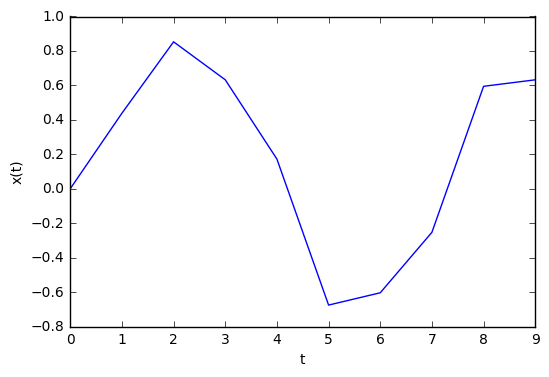

In [3]:
from math import sin
from numpy import arange
from pylab import plot,xlabel,ylabel,show

def f(x,t):
    return -x**3 + sin(t)

a = 0.0
b = 10.0
N = 10
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
x = 0.0

for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    x += (k1+2*k2+2*k3+k4)/6

plot(tpoints,xpoints)
xlabel("t")
ylabel("x(t)")
show()

#### Exercise 8.1 A Low-pass filter

#### 8.1.4 Solutions over Infinite Ranges

Since we would need an infinite number of steps, we can instead change the variables where u = <sup>t</sup>&frasl;<sub>(1+t)</sub> or t = <sup>u</sup>&frasl;<sub>(1-u)</sub>. Then, we can rewrite our differential *<sup>dx</sup>&frasl;<sub>dt</sub> = <sup>dx</sup>&frasl;<sub>du</sub><sup>du</sup>&frasl;<sub>dt</sub> = f(x,t)* We can define a new function *g(x,u) = (1 - u)<sup>-2</sup> f(x,<sup>u</sup>&frasl;<sub>(1-u)<sub>)* to get *<sup>dx</sup>&frasl;<sub>du</sub> = g(x,u)*.

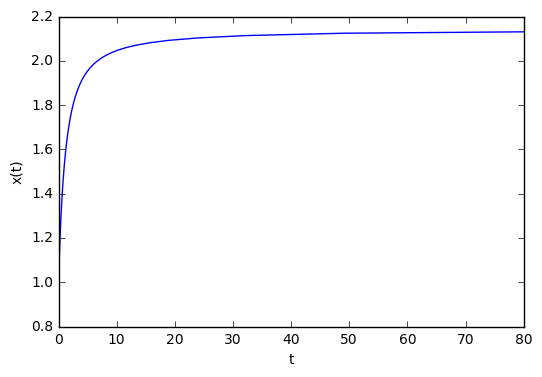

In [4]:
from numpy import arange
from pylab import plot,xlabel,ylabel,xlim,show

def g(x,u):
    return 1/(x**2*(1-u)**2+u**2)

a = 0.0
b = 1.0
N = 100
h = (b-a)/N

upoints = arange(a,b,h)
tpoints = []
xpoints = []

x = 1.0
for u in upoints:
    tpoints.append(u/(1-u))
    xpoints.append(x)
    k1 = h*g(x,u)
    k2 = h*g(x+0.5*k1,u+0.5*h)
    k3 = h*g(x+0.5*k2,u+0.5*h)
    k4 = h*g(x+k3,u+h)
    x += (k1+2*k2+2*k3+k4)/6

plot(tpoints,xpoints)
xlim(0,80)
xlabel("t")
ylabel("x(t)")
show()

## 8.2 Differential Equations With More Than One Variable

A general form for two first-order simultaneous differential equations is *<sup>dx</sup>&frasl;<sub>dt</sub> = f<sub>x</sub>(x,y,t)*, and *<sup>dy</sup>&frasl;<sub>dt</sub> = f<sub>y</sub>(x,y,t)*. There f<sub>x</sub> and f<sub>y</sub> are general, possible nonlinear, fucntions of *x,y,* and *t*. For an arbitrary number of variables the equations can be written using vector notation as 

<sup>d<strong>r</strong></sup>&frasl;<sub>d*t*</sub> = f(<strong>r</strong>, *t*)

Using Taylor expansion, we can expand the vector. Then using Runge-Kutta of order four,

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>k<sub>1</sub></strong> = h f(<strong>r</strong>,t)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>k<sub>2</sub></strong> = h <strong>f</strong>(<strong>r</strong> + <sup>1</sup>&frasl;<sub>2</sub> <strong>k<sub>1</sub></strong>, t + <sup>1</sup>&frasl;<sub>2</sub>h)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>k<sub>3</sub></strong> = h <strong>f</strong>(<strong>r</strong> + <sup>1</sup>&frasl;<sub>2</sub> <strong>k<sub>2</sub></strong>, t + <sup>1</sup>&frasl;<sub>2</sub>h)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>k<sub>4</sub></strong> = h f(<strong>r</strong> + <strong>k<sub>3</sub></strong>, t + h)

&nbsp;&nbsp;&nbsp;<strong>r</strong>(t+h) = <strong>r</strong>(t) + <sup>1</sup>&frasl;<sub>6</sub> (<strong>k<sub>1</sub></strong> + 2<strong>k<sub>2</sub></strong> + 2<strong>k<sub>3</sub></strong> + <strong>k<sub>4</sub><strong>)

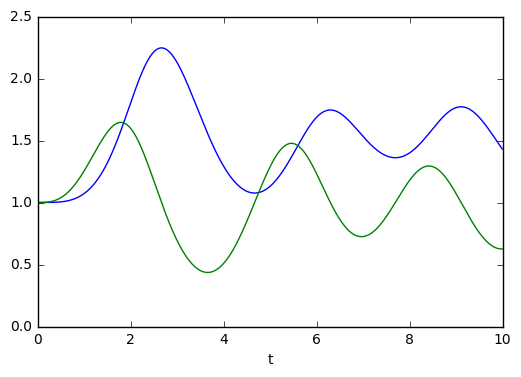

In [5]:
from math import sin
from numpy import array,arange
from pylab import plot,xlabel,show

def f(r,t):
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + sin(t)**2
    return array([fx,fy],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []

r = array([1.0,1.0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plot(tpoints,xpoints)
plot(tpoints,ypoints)
xlabel("t")
show()

#### Exercise 8.2 The Lotka-Bolterra equations

#### Exercise 8.3 The Lorenz equations

## 8.3 Second-Order Differential Equations

<sup>d<sup>2</sup>x</sup>&frasl;<sub>dt<sup>2</sup></sub> = f(x, <sup>dx</sup>&frasl;<sub>dt</sub>,t). We can rewrite this in vector form as <sup>d<sup>2</sup><strong>r</strong></sup>&frasl;<sub>dt<sup>2</sup></sub> = f(<strong>r</strong>, <sup>d<strong>r</strong></sup>&frasl;<sub>dt</sub>,  t). Which is equivalent to first-order equations <sup>d<strong>r</strong></sup>&frasl;<sub>dt</sub> = <strong>s</strong>, <sup>d<strong>s</strong></sup>&frasl;<sub>dt</sub> = f(<strong>r</strong>, <strong>s</strong>, t). More generally, a system of *n* equations of *m*th order can become a system of *m x n* simultaneous first-oder equations, which can be solved by the standard methods.

#### Example 8.6 The Non-linear Pedulum

In [9]:
from math import sin
from numpy import array

g = 9.81
l = 0.1

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*sin(theta)
    return array([ftheta,fomega], float)

# Note: see exercise 8.4 to call it

#### Exercise 8.5 The driven pendulum

#### Exercise 8.6 Harmonic and anharmonic oscillators

#### Exercise 8.7 Trajectory with air resistance

#### Exercise 8.8 Space garbage

#### Exercise 8.9 Vibration in a one-dimensional system

## 8.4 Varying the Step Size

#### Exercise 8.10 Cometary orbits

## Other Methods for Differential Equations

#### 8.5.1 The Leapfrog Method

It uses Runge-Kutta Order Two, and uses the point two previous to calculate the next point.
Error : O(h<sup>3</sup>). One nifty fact is that this method is the same whether going forward (h>0) or going backwards (h&lt;0).

#### 8.5.3 The Verlet Method

If you wish to solve an eqaution of motion of the form <sup>d<sup>2</sup><strong>r</strong></sup>&frasl;<sub>dt<sup>2</sup></sub> = <strong>f</strong>(<strong>r</strong>, t) where r is a d-dimentional vector. First calculate <strong>v</strong>(t+<sup>1</sup>&frasl;<sub>2</sub>h) = <strong>v</strong>(t) + <sup>1</sup>&frasl;<sub>2</sub> h <strong>f</strong>(<strong>r</strong>(t), t), then repeatedly applying:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **r**(t + h) = **r**(t) + h**v**(t+ <sup>1</sup>&frasl;<sub>2</sub>h)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **k** = h**f**(**r**(t+ h), t+h)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **v**(t + h) = **v**(t + <sup>1</sup>&frasl;<sub>2</sub>h) + <sup>1</sup>&frasl;<sub>2</sub>**r**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **v**(t + <sup>3</sup>&frasl;<sub>2</sub>h) = **v**(t + <sup>1</sup>&frasl;<sub>2</sub>h) + **k**

#### Exercise 8.11 Write a program to solve 
<sup>d<sup>2</sup>x</sup>&frasl;<sub>dt<sup>2</sup></sub> - (<sup>dx</sup>&frasl;<sub>dt</sub>)<sup>2</sup> + x + 5 = 0 using the leapfrog method  from t = 0 to t = 50 in steps of h = 0.001 with initial condition x = 1 and dx/dt = 0. Then plot showing x vs t.

#### Exercise 8.12 Orbit of the Earth

#### 8.5.4 The Modified Midpoint Method

#### The Bulirsh-Stoer Method

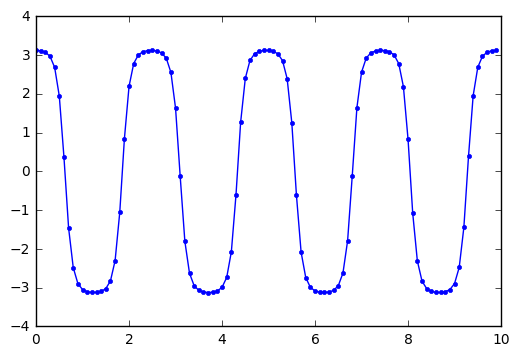

In [10]:
from math import sin,pi
from numpy import empty,array,arange
from pylab import plot,show

g = 9.81
l = 0.1
theta0 = 179*pi/180

a = 0.0
b = 10.0
N = 100          # Number of "big steps"
H = (b-a)/N      # Size of "big steps"
delta = 1e-8     # Required position accuracy per unit time

def f(r):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*sin(theta)
    return array([ftheta,fomega],float)

tpoints = arange(a,b,H)
thetapoints = []
r = array([theta0,0.0],float)

# Do the "big steps" of size H
for t in tpoints:

    thetapoints.append(r[0])

    # Do one modified midpoint step to get things started
    n = 1
    r1 = r + 0.5*H*f(r)
    r2 = r + H*f(r1)

    # The array R1 stores the first row of the
    # extrapolation table, which contains only the single
    # modified midpoint estimate of the solution at the
    # end of the interval
    R1 = empty([1,2],float)
    R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2))

    # Now increase n until the required accuracy is reached
    error = 2*H*delta
    while error>H*delta:

        n += 1
        h = H/n

        # Modified midpoint method
        r1 = r + 0.5*h*f(r)
        r2 = r + h*f(r1)
        for i in range(n-1):
            r1 += h*f(r2)
            r2 += h*f(r1)

        # Calculate extrapolation estimates.  Arrays R1 and R2
        # hold the two most recent lines of the table
        R2 = R1
        R1 = empty([n,2],float)
        R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
        for m in range(1,n):
            epsilon = (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1)
            R1[m] = R1[m-1] + epsilon
        error = abs(epsilon[0])

    # Set r equal to the most accurate estimate we have,
    # before moving on to the next big step
    r = R1[n-1]

# Plot the results
plot(tpoints,thetapoints)
plot(tpoints,thetapoints,"b.")
show()

#### Exercise 8.13 Planetary Orbits

## 8.6 Boundary Value Problems

#### The Shooting Method

In [11]:
from numpy import array,arange

g = 9.81         # Acceleration due to gravity
a = 0.0          # Initial time
b = 10.0         # Final time
N = 1000         # Number of Runge-Kutta steps
h = (b-a)/N      # Size of Runge-Kutta steps
target = 1e-10   # Target accuracy for binary search

# Function for Runge-Kutta calculation
def f(r):
    x = r[0]
    y = r[1]
    fx = y
    fy = -g
    return array([fx,fy],float)

# Function to solve the equation and calculate the final height
def height(v):
    r = array([0.0,v],float)
    for t in arange(a,b,h):
        k1 = h*f(r)
        k2 = h*f(r+0.5*k1)
        k3 = h*f(r+0.5*k2)
        k4 = h*f(r+k3)
        r += (k1+2*k2+2*k3+k4)/6
    return r[0]

# Main program performs a binary search
v1 = 0.01
v2 = 1000.0
h1 = height(v1)
h2 = height(v2)

while abs(h2-h1)>target:
    vp = (v1+v2)/2
    hp = height(vp)
    if h1*hp>0:
        v1 = vp
        h1 = hp
    else:
        v2 = vp
        h2 = hp

v = (v1+v2)/2
print("The required initial velocity is",v,"m/s")

The required initial velocity is 49.04999999999815 m/s


#### 8.6.2 The Relaxation Method

#### 8.6.3 Eigenvalue Problems

#### Example 8.9 Gound State Energy in a Square Well

In [12]:
from numpy import array,arange

# Constants
m = 9.1094e-31     # Mass of electron
hbar = 1.0546e-34  # Planck's constant over 2*pi
e = 1.6022e-19     # Electron charge
L = 5.2918e-11     # Bohr radius
N = 1000
h = L/N

# Potential function
def V(x):
    return 0.0

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy
def solve(E):
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)

    for x in arange(0,L,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

# Main program to find the energy using the secant method
E1 = 0.0
E2 = e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)

print("E =",E2/e,"eV")

E = 134.286371694 eV


#### Exercise 8.14 Quantum oscillators

#### Exercise 8.15 The Double Pendulum

#### Exercise 8.16 The three-body Problem

#### Exercise 8.17 Cometary obits and the Bulirsh-Stoer Method

#### Exercise 8.18 Oscillating chemical reactions